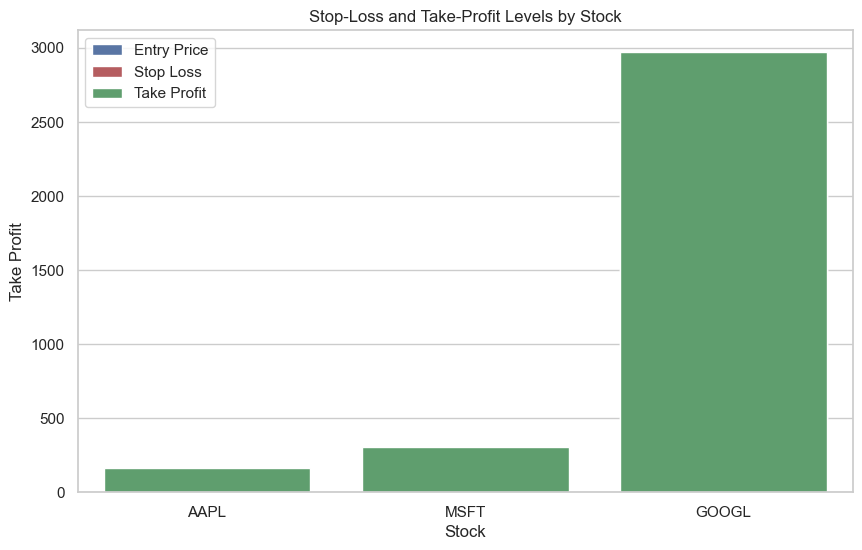

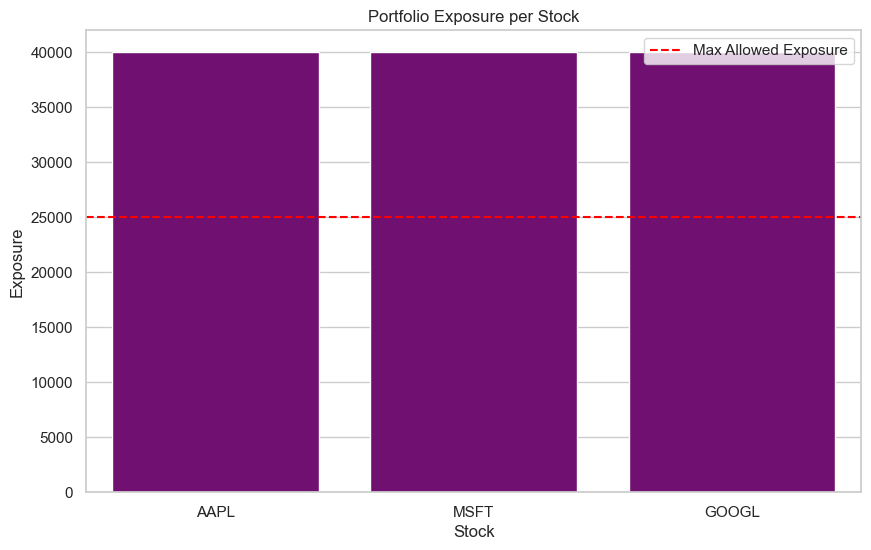

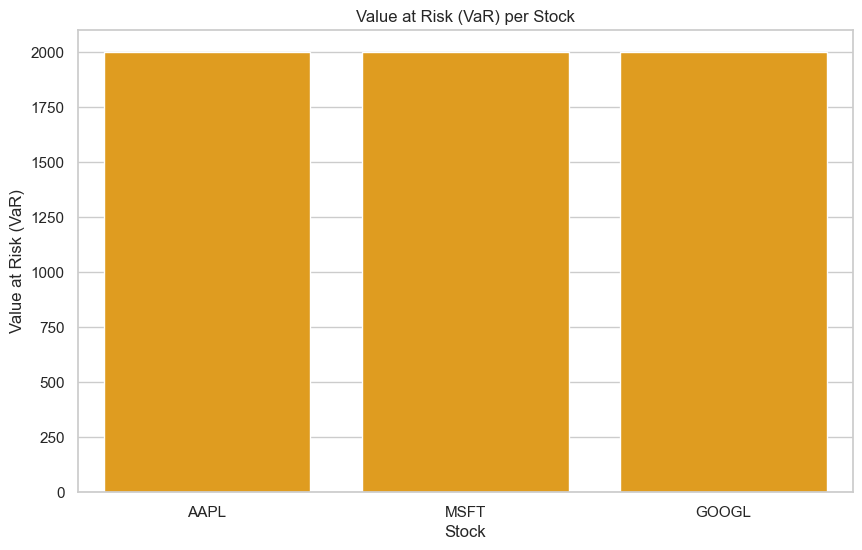

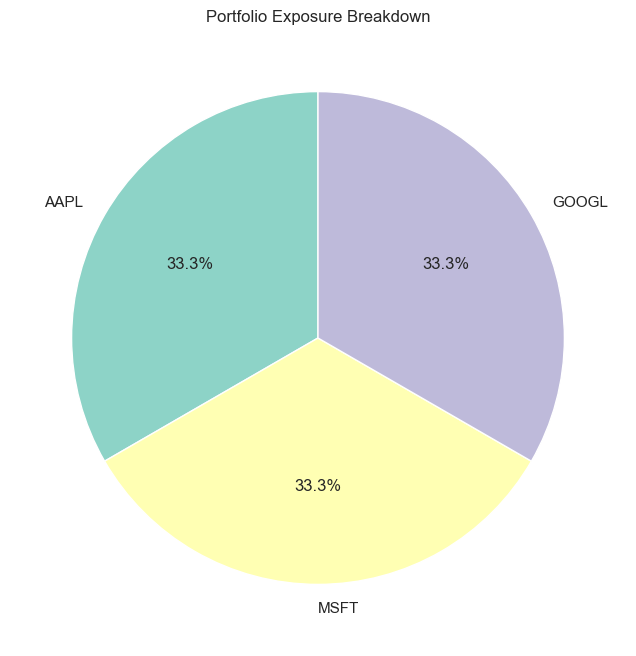

   Stock  Entry Price  Current Price  Stop Loss  Take Profit  Position Size  \
0   AAPL          150            155      142.5        165.0     266.666667   
1   MSFT          280            275      266.0        308.0     142.857143   
2  GOOGL         2700           2600     2565.0       2970.0      14.814815   

   Value at Risk (VaR)  Exposure  
0               2000.0   40000.0  
1               2000.0   40000.0  
2               2000.0   40000.0  


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Constants for risk management
INITIAL_CAPITAL = 100000  # Total capital in USD
RISK_TOLERANCE = 0.02  # Maximum risk per trade (2%)
STOP_LOSS_PERCENTAGE = 0.05  # 5% stop-loss from entry price
TAKE_PROFIT_PERCENTAGE = 0.10  # 10% take-profit from entry price
MAX_PORTFOLIO_EXPOSURE = 0.25  # Max 25% of total capital can be exposed at once

# Function to calculate position size based on risk tolerance
def calculate_position_size(entry_price, stop_loss_price, capital=INITIAL_CAPITAL):
    risk_per_trade = RISK_TOLERANCE * capital
    position_size = risk_per_trade / abs(entry_price - stop_loss_price)
    return position_size

# Function to calculate stop-loss and take-profit levels
def calculate_stop_loss_take_profit(entry_price):
    stop_loss = entry_price * (1 - STOP_LOSS_PERCENTAGE)
    take_profit = entry_price * (1 + TAKE_PROFIT_PERCENTAGE)
    return stop_loss, take_profit

# Example portfolio with entry prices and stock data
portfolio = pd.DataFrame({
    'Stock': ['AAPL', 'MSFT', 'GOOGL'],
    'Entry Price': [150, 280, 2700],
    'Current Price': [155, 275, 2600],
})

# Adding risk management calculations to the portfolio
portfolio['Stop Loss'], portfolio['Take Profit'] = zip(*portfolio['Entry Price'].apply(calculate_stop_loss_take_profit))
portfolio['Position Size'] = portfolio.apply(lambda row: calculate_position_size(row['Entry Price'], row['Stop Loss']), axis=1)
portfolio['Value at Risk (VaR)'] = RISK_TOLERANCE * INITIAL_CAPITAL

# Calculate exposure
portfolio['Exposure'] = portfolio['Position Size'] * portfolio['Entry Price']
total_exposure = portfolio['Exposure'].sum()

# Check if exposure exceeds the limit
if total_exposure > MAX_PORTFOLIO_EXPOSURE * INITIAL_CAPITAL:
    print("Warning: Total portfolio exposure exceeds the allowed limit!")
else:
    print("Total portfolio exposure is within the allowed limit.")

# Visualization

# Seaborn style
sns.set(style="whitegrid")

# Plot 1: Bar chart for Stop-Loss and Take-Profit levels
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock', y='Entry Price', data=portfolio, label="Entry Price", color="b")
sns.barplot(x='Stock', y='Stop Loss', data=portfolio, label="Stop Loss", color="r")
sns.barplot(x='Stock', y='Take Profit', data=portfolio, label="Take Profit", color="g")
plt.title('Stop-Loss and Take-Profit Levels by Stock')
plt.legend(loc='upper left')
plt.show()

# Plot 2: Portfolio Exposure per Stock
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock', y='Exposure', data=portfolio, color='purple')
plt.title('Portfolio Exposure per Stock')
plt.axhline(y=MAX_PORTFOLIO_EXPOSURE * INITIAL_CAPITAL, color='red', linestyle='--', label='Max Allowed Exposure')
plt.legend(loc='upper right')
plt.show()

# Plot 3: Value at Risk (VaR) per Stock
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock', y='Value at Risk (VaR)', data=portfolio, color='orange')
plt.title('Value at Risk (VaR) per Stock')
plt.show()

# Plot 4: Pie chart for Portfolio Exposure Breakdown
plt.figure(figsize=(8, 8))
plt.pie(portfolio['Exposure'], labels=portfolio['Stock'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.title('Portfolio Exposure Breakdown')
plt.show()

# Display the updated portfolio with risk management metrics
print(portfolio)
